In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
params = {'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
from prettytable import PrettyTable
rcParams.update(params)
import matplotlib.pyplot as plt
from matplotlib import rc
def extractDate(videoDate):
    try:
        dataStr = videoDate.split('720p_')[1].split('-UTC')[0].split('.')[0]
        return dataStr.split('-')[0] + '-' + dataStr.split('-')[1] + '-' + dataStr.split('-')[2]
    except:
        dataStr = videoDate.split('stream_')[1].split('-UTC')[0].split('.')[0]
        return dataStr.split('-')[0] + '-' + dataStr.split('-')[1] + '-' + dataStr.split('-')[2]
def time_sec(x):
    try:        
        x = str(x)
        minute = int(x.split('.')[0])*60
        sec = int(x.split('.')[1])
        time = minute+sec
        return time
        
    except:
        pass

In [2]:
data_k = pd.read_excel('video_tags_final.xlsx', sheet_name='KR-video_procedures')
data_m = pd.read_excel('video_tags_final.xlsx')

gestationList = ['27+1','36+6','39+2','39+4','36+0','40+0','35+2','29+4','26+0','36+6']

In [3]:
data_k.rename(columns = {'Procedure or manipulation (Name)':'Procedure'}, inplace = True)

In [4]:
data_k['from_sec'] = data_k['From (min.sec)'].apply(time_sec)
data_m['from_sec'] = data_m['From (min.sec)'].apply(time_sec)

In [5]:
data_k['to_sec'] = data_k['To (min.sec)'].apply(time_sec)
data_m['to_sec'] = data_m['To (min.sec)'].apply(time_sec)

In [6]:
data_k['sec'] = data_k['to_sec'] - data_k['from_sec']
data_m['sec'] = data_m['to_sec'] - data_m['from_sec']

In [11]:
data_m['group']=pd.np.nan
data_k['group']=pd.np.nan

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  


In [12]:
for row in range(len(data_k)):
    if (float(data_k['sec'].iloc[row]) < 50.0):
        data_k['group'].iloc[row]='<50'
    elif((float(data_k['sec'].iloc[row]) >= 50.0) and float(data_k['sec'].iloc[row]) < 100.0):
        data_k['group'].iloc[row]='50-100'
    elif((float(data_k['sec'].iloc[row]) >= 100.0)):
        data_k['group'].iloc[row]='>=100'                       

In [13]:
for row in range(len(data_m)):
    if (float(data_m['sec'].iloc[row]) < 50.0):
        data_m['group'].iloc[row]='<50'
    elif((float(data_m['sec'].iloc[row]) >= 50.0) and float(data_m['sec'].iloc[row]) < 100.0):
        data_m['group'].iloc[row]='50-100'
    elif((float(data_m['sec'].iloc[row]) >= 100.0)):
        data_m['group'].iloc[row]='>=100'                          
          

In [14]:
full_data = pd.concat([data_k,data_m])
full_data['date'] = full_data.apply(lambda x: extractDate(x['Video (Title)']), axis=1)      

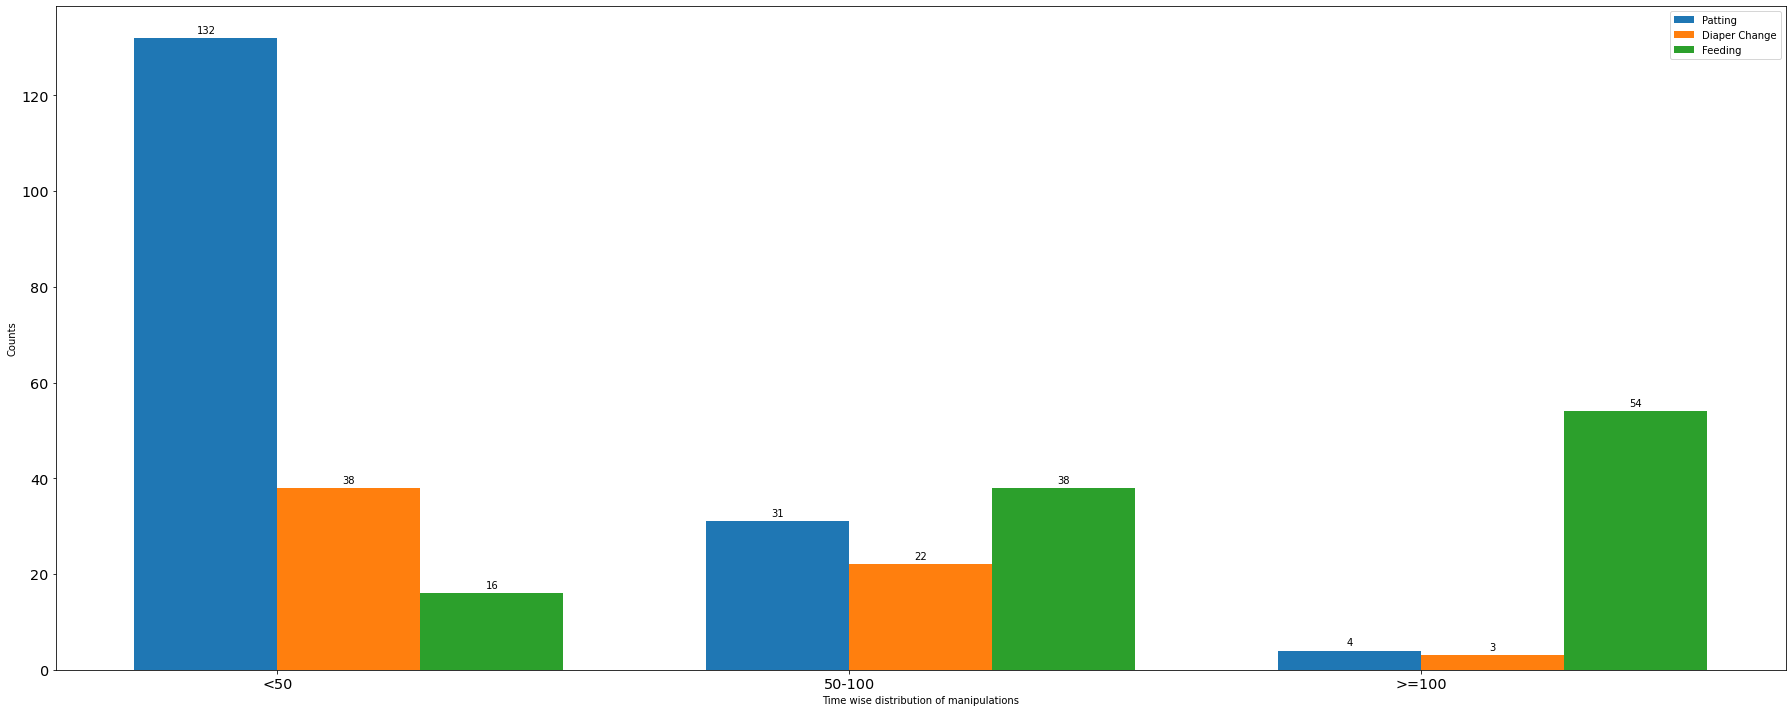

In [59]:
labels = ['<50', '50-100', '>=100']
patting_list = []
feeding_list = []
diaper_change_list = []  

for groupName in labels:
    umbrella = full_data[full_data.group == groupName]
    
    patting = umbrella[umbrella.Label == 'Patting']
    patting_list.append(len(patting))
    
    feeding = umbrella[umbrella.Label == 'Feeding']
    feeding_list.append(len(feeding))
    
    change = umbrella[umbrella.Label == 'Diaper_change']
    diaper_change_list.append(len(change))
    

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - (width/2), patting_list, width, label='Patting')
rects2 = ax.bar(x + width/2, diaper_change_list, width, label='Diaper Change')
rects3 = ax.bar(x+(1.5*width), feeding_list, width, label='Feeding')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_xlabel('Time wise distribution of manipulations')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [64]:
import os
uhidList = full_data.UHID.unique()
minPatting = 9999
minDiaper = 9999
minFeeding = 9999
maxPatting = 0
maxDiaper = 0
maxFeeding = 0



frames_list = pd.read_csv('frames_list.csv')
listPatting = frames_list['Patting'].tolist()
file_list_patting = [x for x in listPatting if str(x) != 'nan']
listFeeding = frames_list['Feeding'].tolist()
file_list_feeding = [x for x in listFeeding if str(x) != 'nan']
listDiaper = frames_list['Diaper_change'].tolist()
file_list_diaper = [x for x in listDiaper if str(x) != 'nan']

l = []
list_diaper_sec = []
list_feeding_sec = []
list_patting_sec = []


feeding_count_total = 0
feeding_frames = 0

patting_count_total = 0
patting_frames = 0

change_count = 0
change_frames = 0
    
counter = 0
for uhid in uhidList:
    counter = counter + 1
    uhidStr = str(uhid)
    new_df = pd.DataFrame()
    data_baby = full_data[full_data['UHID'] == uhid]
   
    diaper_change_count = data_baby[data_baby.Label == 'Diaper_change']
    matching_train_d = [s for s in file_list_diaper if uhidStr in s]
    
    
    change_count = change_count + len(diaper_change_count)
    change_frames = change_frames + len(matching_train_d)
    
    if(len(diaper_change_count) > 0):
        list_diaper_sec.extend(diaper_change_count.sec)
        if min(diaper_change_count.sec) < minDiaper:
            minDiaper = min(diaper_change_count.sec)
        if max(diaper_change_count.sec) > maxDiaper:
            maxDiaper = max(diaper_change_count.sec)
            
    feeding_count = data_baby[data_baby.Label == 'Feeding']
    matching_train_f = [s for s in file_list_feeding if uhidStr in s]    
   
    feeding_count_total = feeding_count_total + len(feeding_count)
    feeding_frames = feeding_frames + len(matching_train_f)
    
    
    if(len(feeding_count) > 0):
        list_feeding_sec.extend(feeding_count.sec)
        if min(feeding_count.sec) < minFeeding:
            minFeeding = min(feeding_count.sec)
        if max(feeding_count.sec) > maxFeeding:
            maxFeeding = max(feeding_count.sec)
            
    patting_count = data_baby[data_baby.Label == 'Patting']
    matching_train_p = [s for s in file_list_patting if uhidStr in s]
        
    patting_count_total = patting_count_total + len(patting_count)
    patting_frames = patting_frames + len(matching_train_p)
    
    if(len(patting_count) > 0):
        list_patting_sec.extend(patting_count.sec)
        if min(patting_count.sec) < minPatting:
            minPatting = min(patting_count.sec)
        if max(patting_count.sec) > maxPatting:
            maxPatting = max(patting_count.sec)
        
    new_df['sec'] = data_baby['sec'].dropna()    
    
    data_row = [str(counter),'Male',gestationList[counter-1],round(sum(new_df.sec) / 60),str(len(patting_count)) + ' (' + str(len(matching_train_p)) +')',str(len(feeding_count)) + ' (' + str(len(matching_train_f)) +')', str(len(diaper_change_count)) + ' (' + str(len(matching_train_d)) +')']
    l.append(data_row)
    
mean_d = sum(list_diaper_sec) / len(list_diaper_sec) 
variance = sum([((x - mean_d) ** 2) for x in list_diaper_sec]) / len(list_diaper_sec) 
res_d = variance ** 0.5


mean_f = sum(list_feeding_sec) / len(list_feeding_sec) 
variance = sum([((x - mean_f) ** 2) for x in list_feeding_sec]) / len(list_feeding_sec) 
res_f = variance ** 0.5

mean_p = sum(list_patting_sec) / len(list_patting_sec) 
variance = sum([((x - mean_p) ** 2) for x in list_patting_sec]) / len(list_patting_sec) 
res_p = variance ** 0.5


l_2 =  [['Patting',minPatting,maxPatting,str(round(mean_p,1)) + ' (' + str(round(res_p,1)) + ')'],['Diaper Change',minDiaper,maxDiaper,str(round(mean_d,1)) + ' (' + str(round(res_d,1)) + ')'],['Feeding',minFeeding,maxFeeding,str(round(mean_f,1)) + ' (' + str(round(res_f,1)) + ')']]


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [61]:
table = PrettyTable(['S.No.','Gender','Gestation','Duration(Frames/Minute)','Patting ' + str(patting_count_total) + '( ' + str(patting_frames) + ')','Feeding '+ str(feeding_count_total) + '( ' + str(feeding_frames) + ')','Diaper Change ' + str(change_count) + '( ' + str(change_frames) + ')'])

for rec in l:
    table.add_row(rec)

print(table)

+-------+--------+-----------+-------------------------+---------------------+----------------------+--------------------------+
| S.No. | Gender | Gestation | Duration(Frames/Minute) | Patting 167( 82796) | Feeding 108( 173762) | Diaper Change 63( 46698) |
+-------+--------+-----------+-------------------------+---------------------+----------------------+--------------------------+
|   1   |  Male  |    27+1   |           628           |      64 (33330)     |      50 (97294)      |        30 (21300)        |
|   2   |  Male  |    36+6   |           1065          |      34 (20767)     |      21 (22686)      |        14 (13214)        |
|   3   |  Male  |    39+2   |            99           |       1 (677)       |       1 (2206)       |         1 (1336)         |
|   4   |  Male  |    39+4   |           623           |       6 (5286)      |       4 (3934)       |         1 (631)          |
|   5   |  Male  |    36+0   |            10           |       3 (3273)      |       1 (1501)    

In [62]:
table = PrettyTable(['Event','Minimum Duration (seconds)','Maximum Duration (seconds)','Average Duration (seconds)'])



for rec in l_2:
    table.add_row(rec)

print(table)

+---------------+----------------------------+----------------------------+----------------------------+
|     Event     | Minimum Duration (seconds) | Maximum Duration (seconds) | Average Duration (seconds) |
+---------------+----------------------------+----------------------------+----------------------------+
|    Patting    |            4.0             |           137.0            |        33.0 (26.2)         |
| Diaper Change |            17.0            |           136.0            |        49.3 (24.6)         |
|    Feeding    |            25.0            |           300.0            |        108.9 (55.3)        |
+---------------+----------------------------+----------------------------+----------------------------+
